<a href="https://colab.research.google.com/github/danjonesss/ResearchProject/blob/main/MNIST_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install codecarbon

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from codecarbon import EmissionsTracker
import time
from random import randint
from sklearn import svm

In [3]:
ET = EmissionsTracker()
svmET = EmissionsTracker()
num_classes = 10
input_shape = (28,28,1)

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")


y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

ET.start()
StartTime = time.time()
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
batch_size = 64
epochs = 24

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
emissions: float = ET.stop()
EndTime = time.time() - StartTime

[codecarbon INFO @ 18:42:49] [setup] RAM Tracking...
[codecarbon INFO @ 18:42:50] [setup] GPU Tracking...
[codecarbon INFO @ 18:42:50] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:42:50] [setup] CPU Tracking...
[codecarbon WARNING @ 18:42:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 18:42:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 18:42:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 18:42:51] >>> Tracker's metadata:
[codecarbon INFO @ 18:42:51]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 18:42:51]   Python version: 3.10.12
[codecarbon INFO @ 18:42:51]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:42:51]   Available RAM : 12.675 GB
[codecarbon INFO @ 18:42:51]   CPU count: 2
[codecarbon INFO @ 18:42:51]   CPU model: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 18:42:51]   GPU c

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                 

[codecarbon INFO @ 18:43:08] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 18:43:08] Energy consumed for all GPUs : 0.000135 kWh. Total GPU Power : 32.430667738395194 W
[codecarbon INFO @ 18:43:08] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 18:43:08] 0.000332 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:43:23] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 18:43:23] Energy consumed for all GPUs : 0.000285 kWh. Total GPU Power : 35.957166649150835 W
[codecarbon INFO @ 18:43:23] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 18:43:23] 0.000679 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:43:38] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 18:43:38] Energy consumed for all GPUs : 0.000457 kWh. Total GPU Power : 41.325978306871

In [4]:
score = model.evaluate(x_test, y_test, verbose=1)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
Y_test = np.argmax(y_test,axis=1)
cm = confusion_matrix(Y_test,y_pred)
print(cm)
accuracy = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred,average="micro")
recall = recall_score(Y_test,y_pred,average="micro")
f1 = f1_score(Y_test,y_pred,average="micro")
print("")
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

313/313 [==============================] - 1s 2ms/step
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1131    3    0    0    0    1    0    0    0]
 [   1    0 1025    0    0    0    0    5    1    0]
 [   0    0    3 1004    0    2    0    0    1    0]
 [   0    0    0    0  975    0    3    1    2    1]
 [   1    0    0    4    0  885    1    0    1    0]
 [   1    1    0    0    1    4  950    0    1    0]
 [   0    2    2    1    0    0    0 1022    1    0]
 [   2    0    1    0    0    0    0    0  969    2]
 [   1    0    0    2    5    7    1    4    3  986]]

Accuracy:  0.9925
Precision:  0.9925
Recall:  0.9925
F1 Score:  0.9925


In [6]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

y_train_svm = np.argmax(y_train, axis=1)
y_test_svm = np.argmax(y_test, axis=1)

svmET.start()
svm_StartTime = time.time()
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train_flat, y_train_svm)
svm_EndTime = time.time() - svm_StartTime
svm_emissions: float = svmET.stop()

y_pred_svm = svm_model.predict(x_test_flat)
svm_cm = confusion_matrix(y_test_svm, y_pred_svm)

svm_accuracy = accuracy_score(y_test_svm, y_pred_svm)
svm_precision = precision_score(y_test_svm, y_pred_svm, average="micro")
svm_recall = recall_score(y_test_svm, y_pred_svm, average="micro")
svm_f1 = f1_score(y_test_svm, y_pred_svm, average="micro")

print(svm_cm)
print("\nSVM Accuracy: ", svm_accuracy)
print("SVM Precision: ", svm_precision)
print("SVM Recall: ", svm_recall)
print("SVM F1 Score: ", svm_f1)

[codecarbon INFO @ 18:44:36] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 18:44:36] Energy consumed for all GPUs : 0.000130 kWh. Total GPU Power : 31.160823442865034 W
[codecarbon INFO @ 18:44:36] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 18:44:36] 0.000327 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:44:51] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 18:44:51] Energy consumed for all GPUs : 0.000260 kWh. Total GPU Power : 31.28234779099024 W
[codecarbon INFO @ 18:44:51] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 18:44:51] 0.000654 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:45:06] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 18:45:06] Energy consumed for all GPUs : 0.000391 kWh. Total GPU Power : 31.4556240837559

[[ 957    0    4    1    1    6    9    1    0    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   8    6  967   11    3    3    7    8   17    2]
 [   4    3   16  947    1   16    0    9   12    2]
 [   1    1   10    1  942    2    4    2    3   16]
 [  10    4    3   36    6  803   13    1   14    2]
 [   9    2   13    1    5   16  910    1    1    0]
 [   1    8   21   10    8    1    0  957    3   19]
 [   8    4    6   25    7   26    6    7  877    8]
 [   7    7    2   11   33    4    0   18    5  922]]

SVM Accuracy:  0.9404
SVM Precision:  0.9404
SVM Recall:  0.9404
SVM F1 Score:  0.9404


Test loss: 0.025244545191526413
Test accuracy: 0.9925000071525574


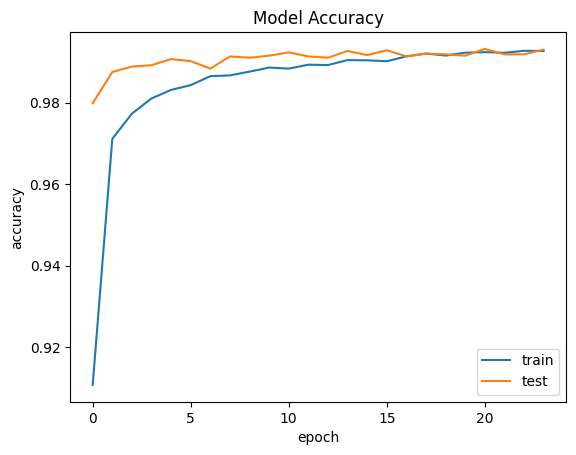


NN Emissions: 0.0007119272329393654 kg
SVM Emissions: 0.0018210756967446656 kg

NN Time taken:  85.0019199848175 seconds
SVM Time taken:  238.2961483001709 seconds

NN Accuracy :  99.25 %
SVM Accuracy :  94.04 %



In [7]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
print("")
print(f'NN Emissions: {emissions} kg')
print(f'SVM Emissions: {svm_emissions} kg')
print("")
print("NN Time taken: ", EndTime, "seconds")
print("SVM Time taken: ", svm_EndTime, "seconds")
print("")
print("NN Accuracy : ", accuracy*100, "%")
print("SVM Accuracy : ", svm_accuracy*100, "%")
print("")

[]

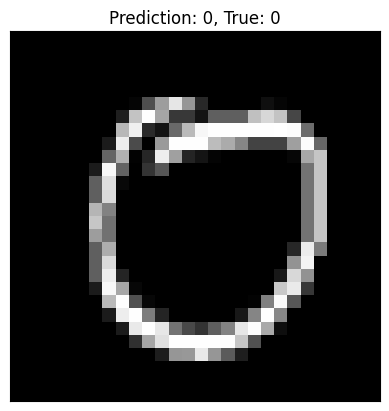

In [8]:
fig, ax1 = plt.subplots(1,1)
num = randint(0,9999)
ax1.imshow(x_test[num], cmap='gray', interpolation = 'none')
ax1.set_title('Prediction: {}, True: {}'.format(y_pred[num], Y_test[num]))
ax1.set_xticks([])
ax1.set_yticks([])

[]

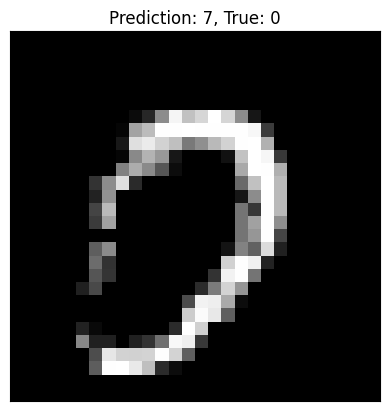

In [9]:
misclassified_indices = np.where(Y_test != y_pred)[0]

fig, ax2 = plt.subplots(1,1)
num1 = np.random.choice(misclassified_indices)
ax2.imshow(x_test[num1], cmap='gray', interpolation = 'none')
ax2.set_title('Prediction: {}, True: {}'.format(y_pred[num1], Y_test[num1]))
ax2.set_xticks([])
ax2.set_yticks([])
